✅ Cleaned dataset saved to ../data/heart_clean.csv
Final shape: (297, 14)


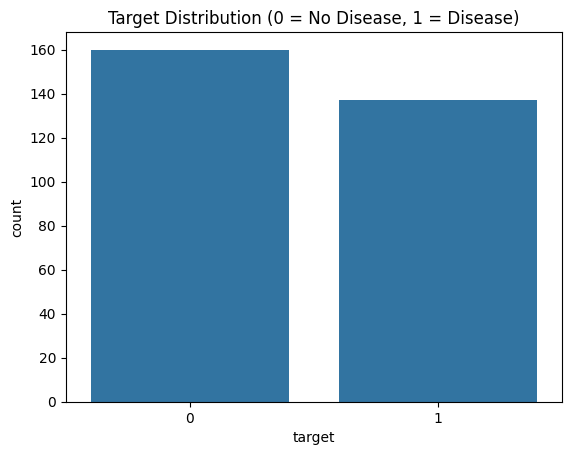

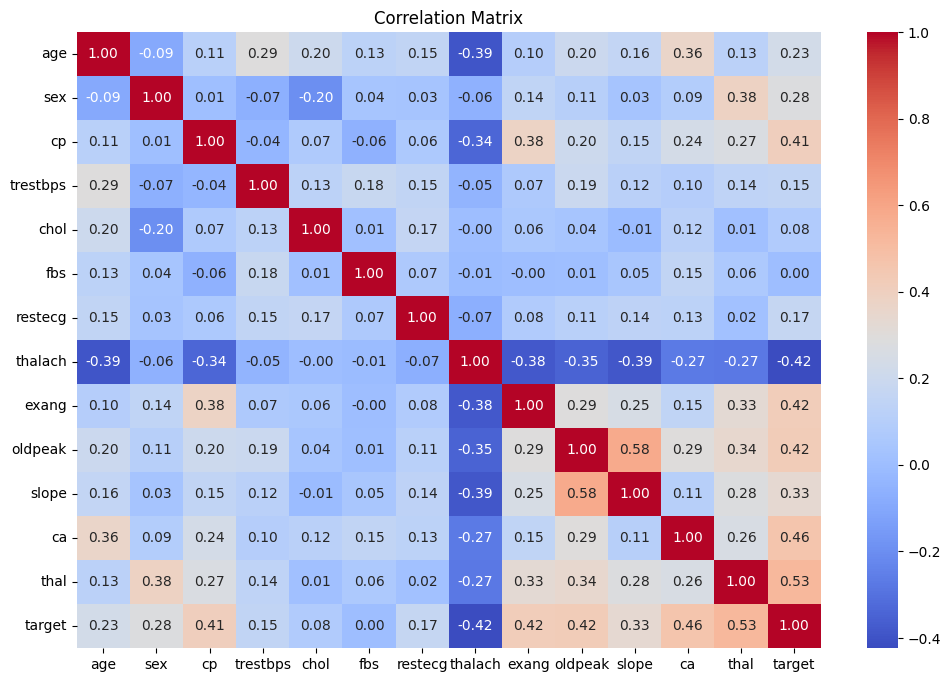

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

DATA_PATH = "../data/heart_disease.csv"
OUTPUT_PATH = "../data/heart_clean.csv"

df_raw = pd.read_csv(DATA_PATH, header=None)

if str(df_raw.iloc[0, -1]).lower() == "target":
    df_raw = df_raw.drop(0).reset_index(drop=True)

cols = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','target'
]
df_raw.columns = cols


df = df_raw.replace("?", np.nan)

df[['ca','thal']] = df[['ca','thal']].apply(pd.to_numeric, errors='coerce')


df['target'] = df['target'].astype(float) 
df['target'] = (df['target'] > 0).astype(int)

df = df.dropna().reset_index(drop=True)

df.to_csv(OUTPUT_PATH, index=False)
print(f"✅ Cleaned dataset saved to {OUTPUT_PATH}")
print("Final shape:", df.shape)

sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
